## Overview of the Diabetes Prediction Project

This project aims to develop a predictive model for diabetes using various machine learning techniques. Diabetes is a chronic condition characterized by high levels of sugar in the blood, which can lead to serious health complications if not managed properly. Early detection and intervention are crucial for effective management and prevention of diabetes-related complications.

### Objectives
- **Data Collection and Preprocessing**: Data collected for kaggle website. Perform data cleaning, handling missing values, and feature scaling to prepare the data for analysis.
- **Exploratory Data Analysis (EDA)**: Check for values that are off and are not representative of real data, Conduct EDA to understand the data distribution, identify patterns, and visualize relationships between different features and the target variable (diabetes status).
- **Model Development**: Implement various machine learning algorithms such as Logistic Regression, Decision Trees, Random Forest, Support Vector Machines, to predict the likelihood of an individual having diabetes.
- **Model Evaluation**: Evaluate the performance of the models using metrics such as accuracy, precision, recall, F1-score, and the area under the Receiver Operating Characteristic (ROC) curve. Perform cross-validation to ensure the models are robust and generalize well to unseen data.

### Dataset
The dataset used for this project typically includes features such as:
- Age
- Body Mass Index (BMI)
- Blood Pressure
- Skin Thickness
- Glucose Levels
- Insulin Levels
- Diabetes Pedigree Function,(chances of a patient becoming a diabetic based on family history)
- Pregnancies

### Conclusion
By the end of this project, we aim to have a reliable predictive model that can assist in the early detection of diabetes. This model can potentially be integrated into healthcare systems to provide timely interventions and improve patient outcomes.

In [1]:
# import all the necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('/data_sets/diabetes.csv')
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().mean() * 100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
mean_age = round(df['Age'].mean())
print('The mean age of patients is', mean_age, 'years')

The mean age of patients is 33 years


# EXPLORATORY DATA ANALYSIS (EDA)

In [8]:
df.shape

(768, 9)

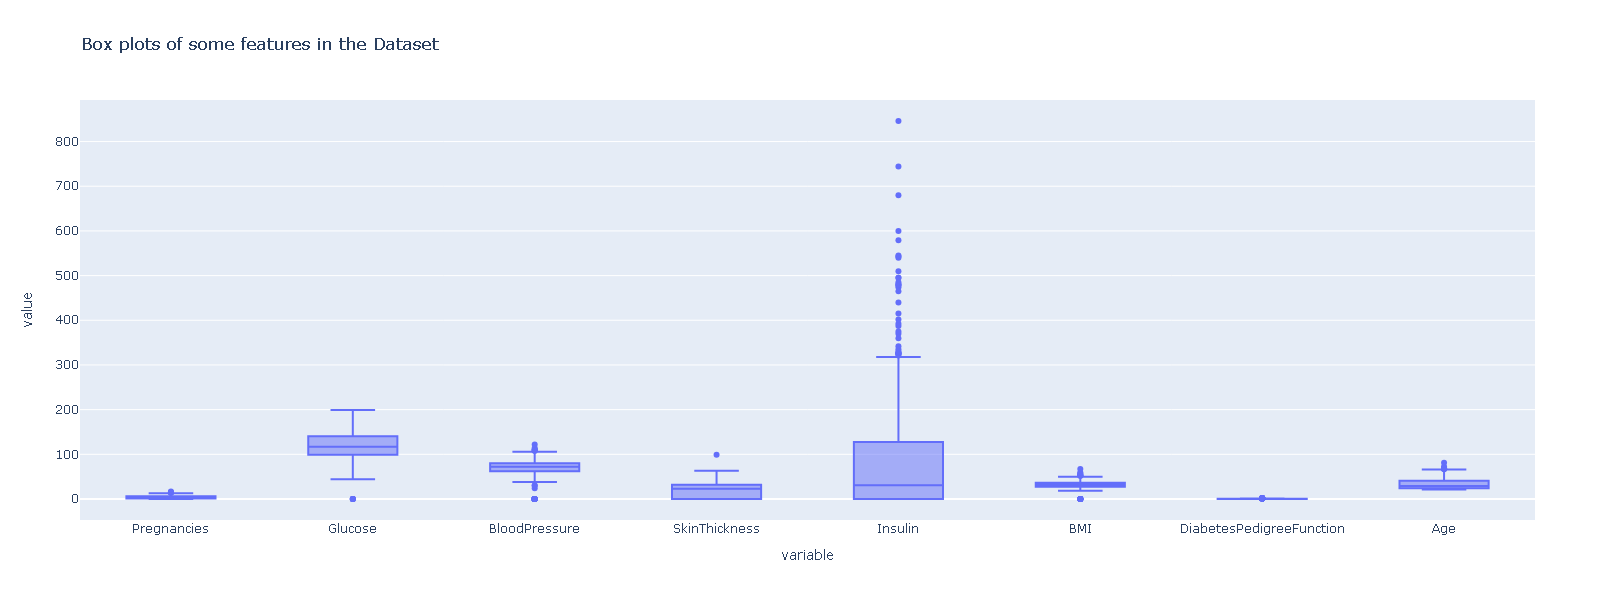

In [9]:
# distribution using box plot 

cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age']
fig = px.box(df[cols], title='Box plots of some features in the Dataset', height=600, width=1200)
fig.show()

A few of the features like Pregnancies, Glucose, SkinThckness, DiabetesPedigreeFunction have zero values which is erroneous in the real world. We can replace these values using K-Nearest Neighbhors (KNN) inputation to give the features more realistic values.

In [10]:
# these are columns with zeros 
zero_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI'] 

# Replace zeros with NaN
df[zero_columns] = df[zero_columns].replace(0, np.nan)

# input missing values with mean of each column 
imputer = SimpleImputer(strategy='mean')
df[zero_columns] = imputer.fit_transform(df[zero_columns])

I replaced 0's in some columns which were introduced as a result of errors during data entry, with the means of each columns, to adjust the distribution.

C:\Users\DAVID\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



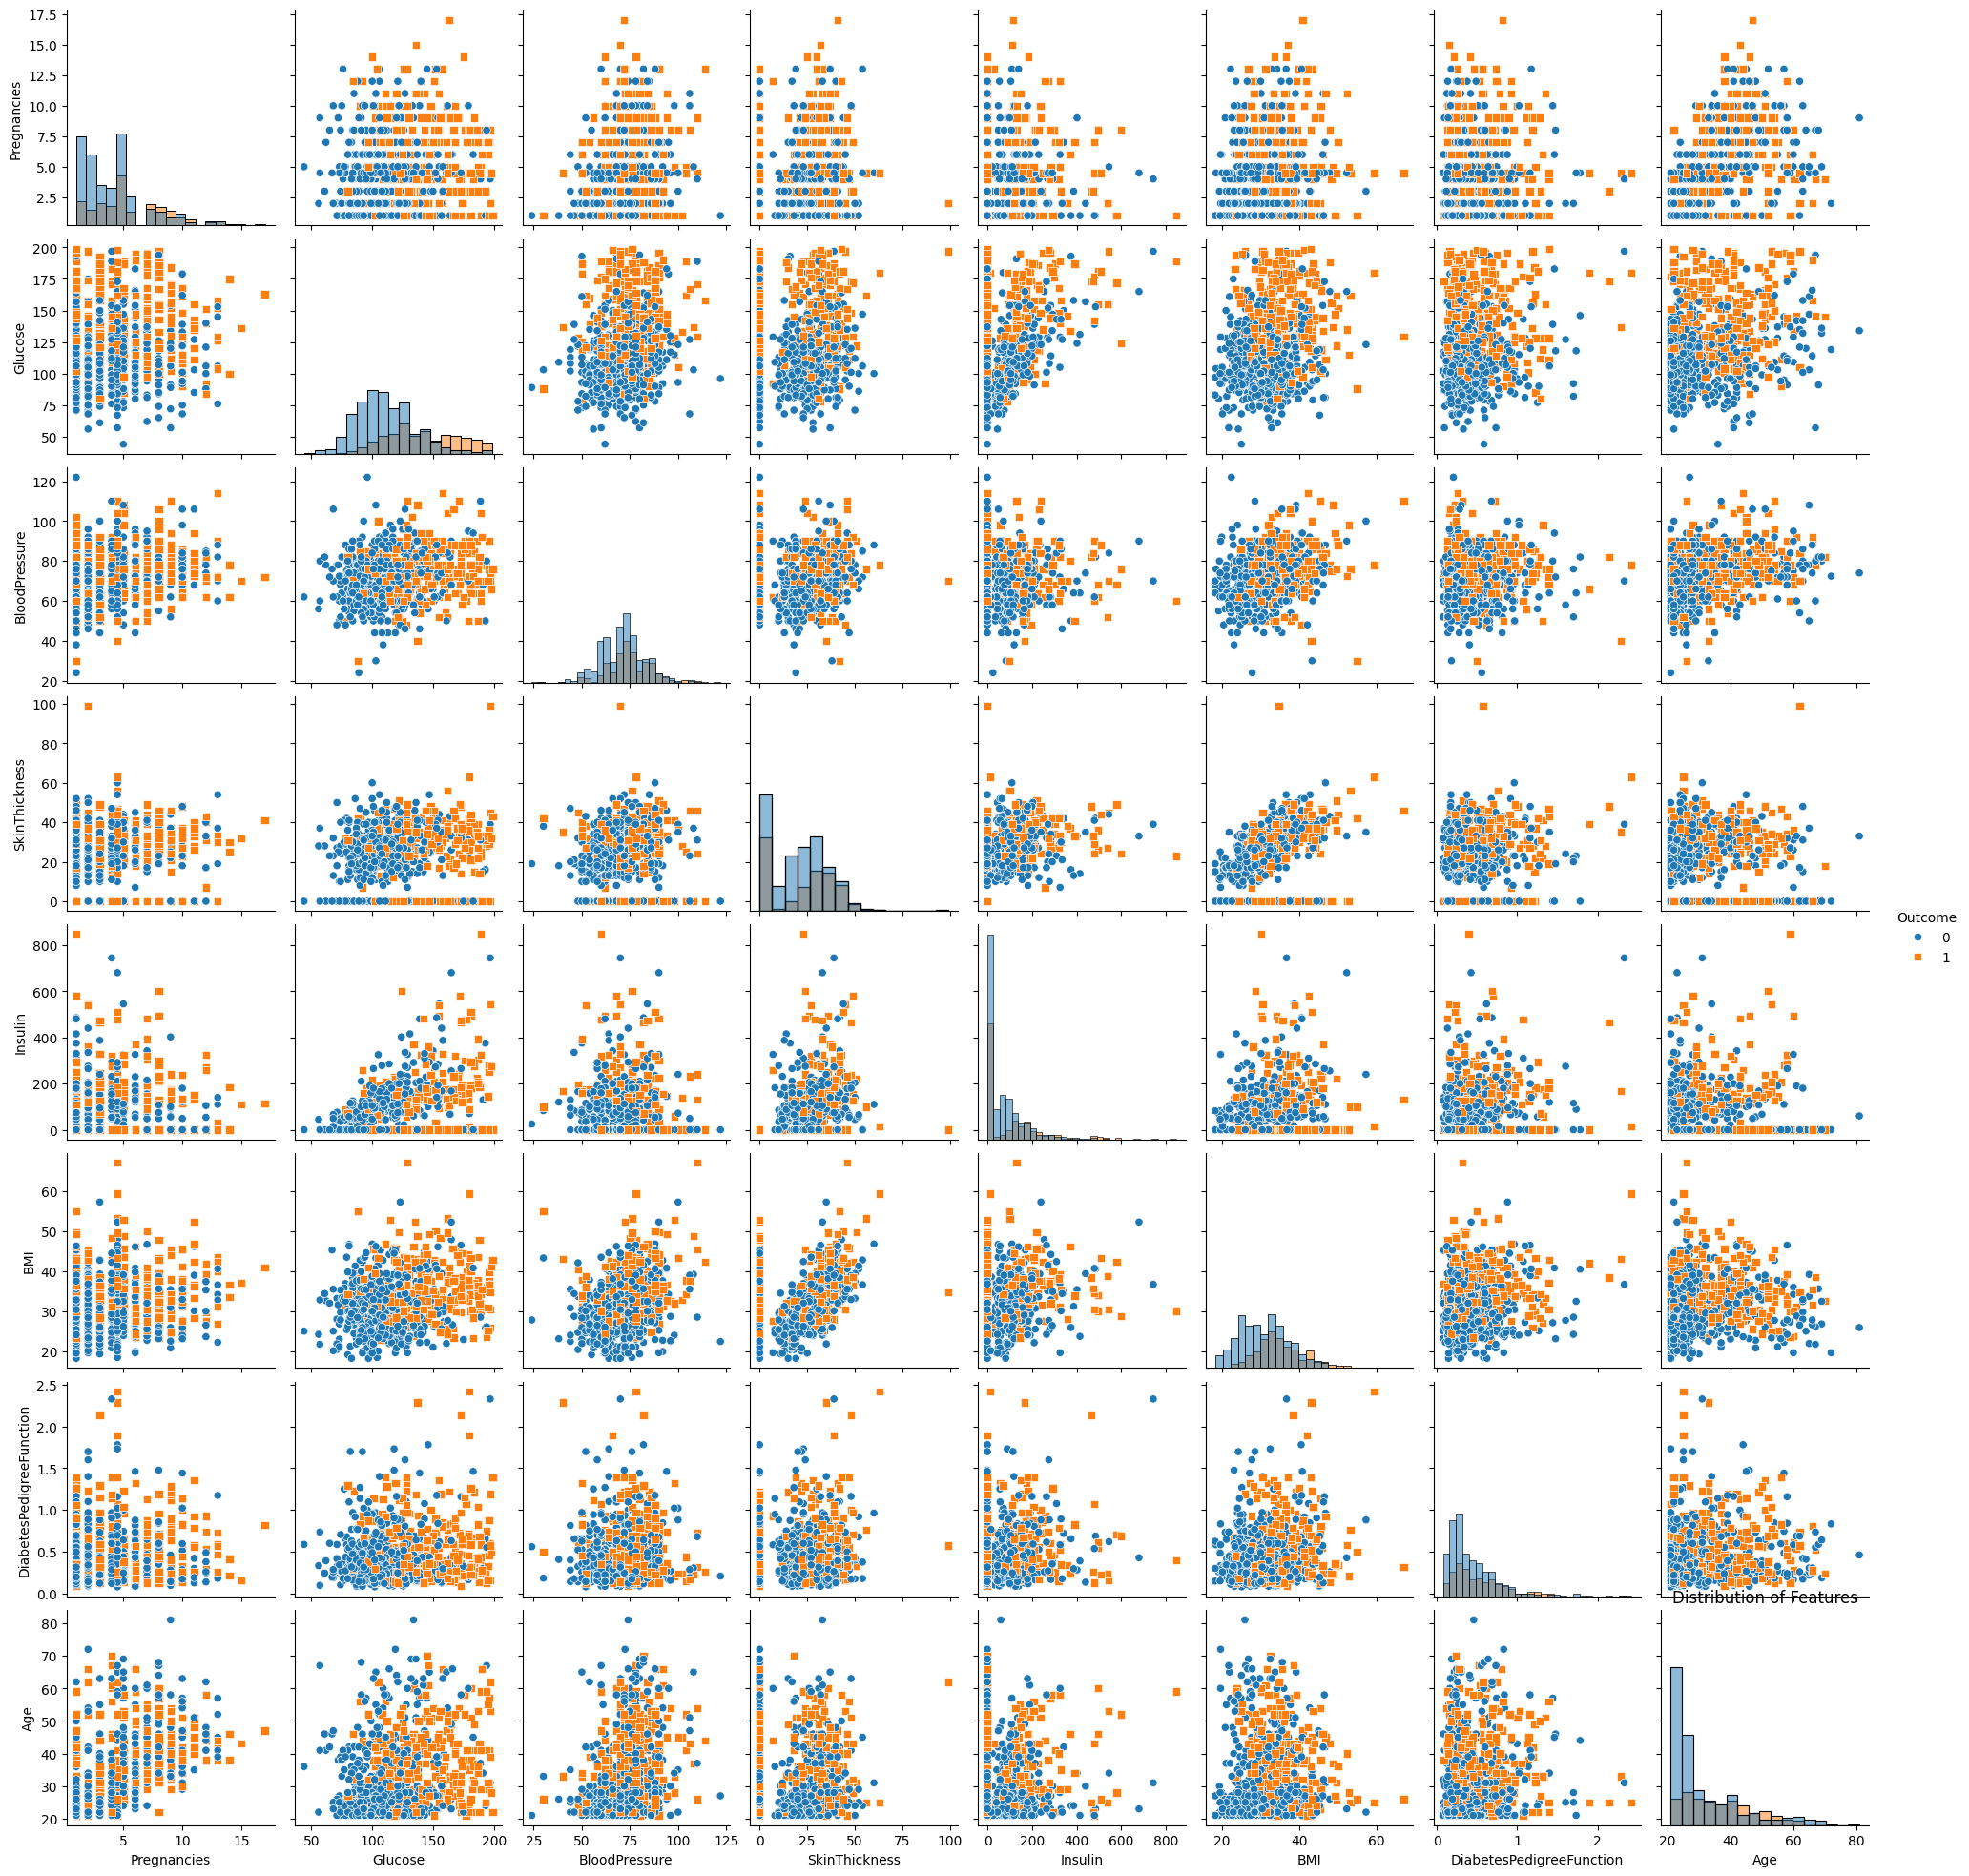

In [11]:
# Study the disribution of the data and relationship between features
sns.pairplot(df, hue= 'Outcome', markers=["o", "s"], diag_kind='hist')
plt.title('Distribution of Features')
plt.show()

**Inferences:** All the features in the datasets are skewed to right, showing that there are more data in the lower boundary.    

In [12]:
# columns to transform 
transform_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age']

# apply quantile transformation to data 
quant_transformer = QuantileTransformer(n_quantiles = 700, output_distribution = 'normal')
transformed_df = quant_transformer.fit_transform(df[transform_cols])

trans = pd.DataFrame(transformed_df, columns = df[transform_cols].columns)
transformed_df = pd.concat([trans, df['Outcome']], axis=1)

C:\Users\DAVID\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



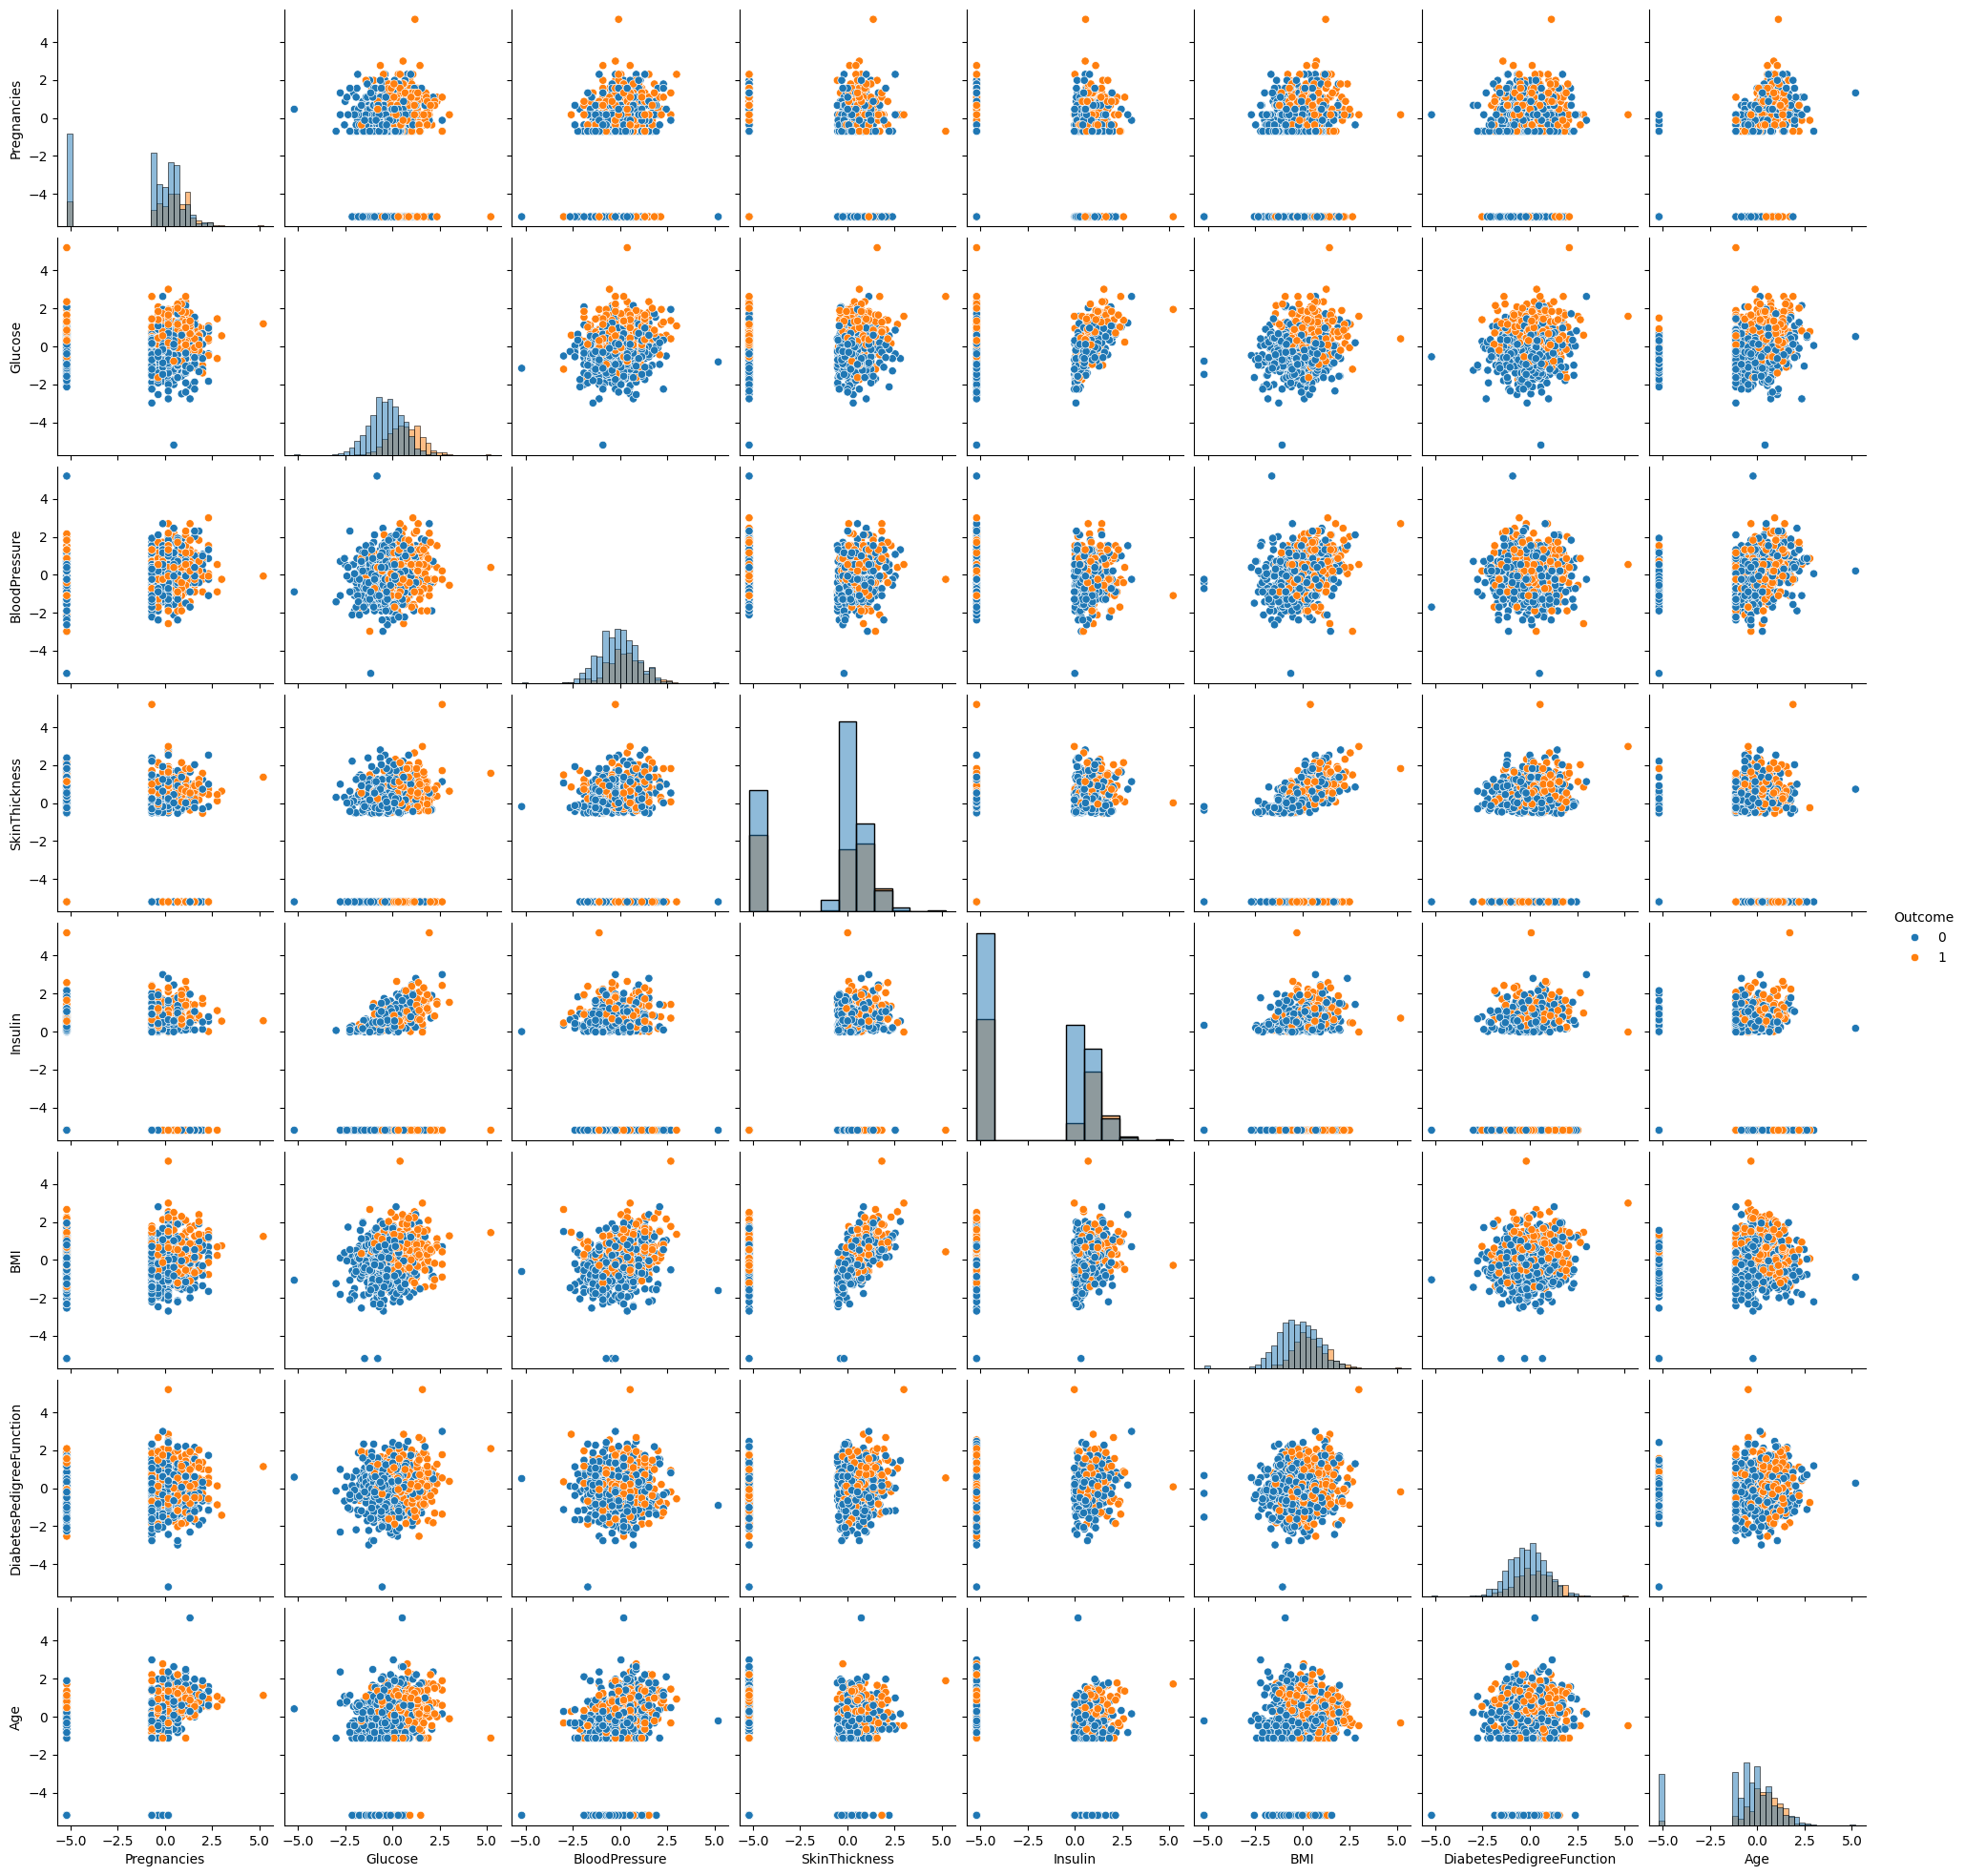

In [13]:
# Let's see the difference in distribution 
sns.pairplot(transformed_df, hue='Outcome', diag_kind = 'hist')

We can clearly see the difference in the distribution are replacing null values and filling with the mean of the feature, it has a unform distribution comapred to the previous which was skewed. 

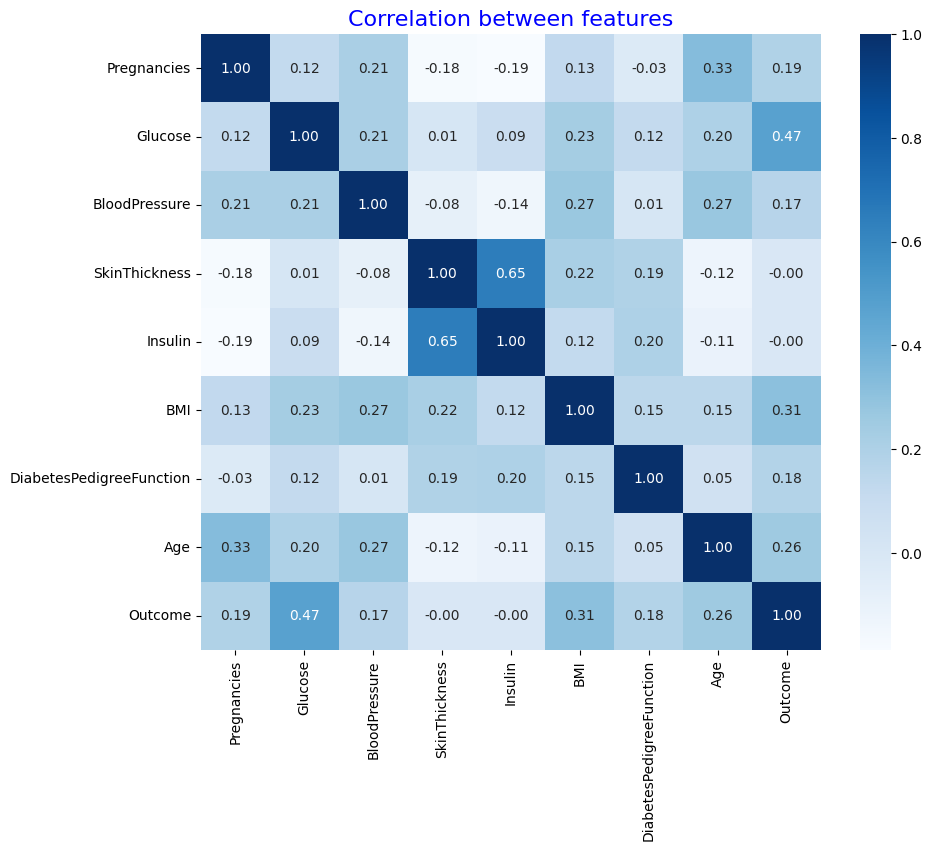

In [14]:
# to check the relationship between features
correlation = transformed_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot = True, fmt='.2f', cmap='Blues')
plt.title('Correlation between features', fontsize=16,  color='blue')
plt.show()

We see a positive correlation of 0.65 between skin thickness and insulin. An increase in fat in the skin is associated with an increase in insulin (blood glucose) in the blood.

In [15]:
# Proportion of positive and negative diabetes results
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

There are 500 non-diabetic cases and 268 cases of diabetes.

In [16]:
# list of columns in the dataframe
list(transformed_df.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

# MODEL TRAINING

In [17]:
# Split data into features and target
x = transformed_df.drop('Outcome', axis = 1)
y = transformed_df['Outcome']

# Split the data into training and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [18]:
# transform data
scaler = StandardScaler()

# transform train and test set
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
# Check the shape of the scaled data
print("X_train shape:", x_train_scaled.shape)
print("X_test shape:", x_test_scaled.shape[0])

X_train shape: (537, 8)
X_test shape: 231


# DESCION TREE CLASSIFIER

To make prediction using descision tree classifier and also check the importance of each feature in the dataset.

In [20]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
# predicition 
clf_pred = clf.predict(x_test_scaled)

In [22]:
# accuracy of the model 
accuracy = accuracy_score(y_test, clf_pred)
print('Test Accuracy = ', accuracy)

Test Accuracy =  0.7012987012987013


The decision tree classifier has an accuracy of 70%

In [23]:
print('Confusion Matrix:\n')
print(confusion_matrix(y_test, clf_pred))

Confusion Matrix:

[[108  43]
 [ 26  54]]


# LOGISTIC REGRESSION

In [24]:
# Initialize model 
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

In [25]:
# predicted results
y_pred = log_reg.predict(x_test_scaled)

In [26]:
# to check model accuracy
test_accuracy = accuracy_score(y_pred, y_test)
print(f"The Accuracy of simple logistic regression on test set: {test_accuracy:.2f}")

The Accuracy of simple logistic regression on test set: 0.74


In [27]:
train_pred = log_reg.predict(x_train_scaled)

train_accuracy = accuracy_score(train_pred, y_train)
print(f"The Accuracy of simple logistic regression on train set: {train_accuracy:.2f}")

The Accuracy of simple logistic regression on train set: 0.78


Test score of 74%, training score of 78%. The small difference shows that the model is likely not overfitting excessively on the training set.

# SUPPORT VECTOR CLASSIFIER (SVC)

In [28]:
# use grid search to find the paramters to train the model
# Define the parameters to search for the best 
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Kernel type
}

# svm classifier
svm = SVC()

# GridSearchCV 
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# to perform the gridsearch operation 
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [29]:
# print best parameters
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [30]:
# best score
print(f'Best Score: {grid_search.best_score_}')

Best Score: 0.7671685704395985


In [31]:
# to evaulate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)

In [32]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")

Test Set Accuracy: 0.7445887445887446


The test score is 74%, same score produced by logistic regression model.

Text(0.5, 1.0, 'Confusion Matrix of Model')

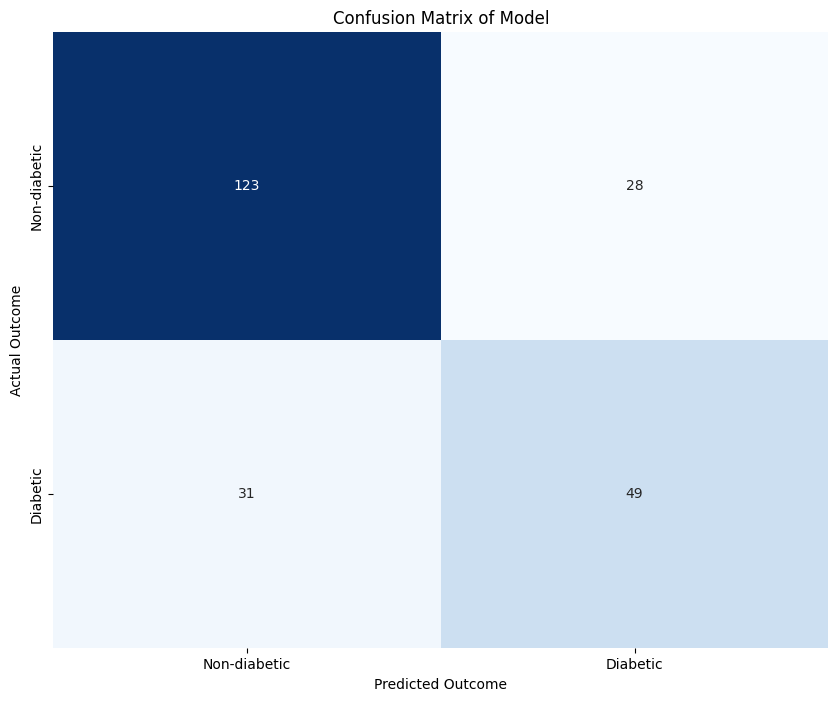

In [33]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# visualize the confusion matrix 
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='.0f', cbar=False,
            xticklabels = ['Non-diabetic', 'Diabetic'],
            yticklabels = ['Non-diabetic', 'Diabetic'])
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.title('Confusion Matrix of Model')
                           

**INFERENCES**
1. **True Negative:** This is the number of cases that the model correctly predicted as non-diabetic that are truly non-diabetic. We have 123 of such cases indicating that model accurately identifie these individuals as not having diabetes.  
2. **False Positve:** These are  cases that model predicted as diabetic but a actually non-diabetic, there are 28 of such cases. This suggests that the model has some tendency to mistakenly identify non-diabetic individuals as diabetic.
3. **False Negative:** The model incorrectly predicted 31 diabetic cases as non-diabetic.
4. **True Positive:** They are 49 cases here. These are the number of cases that the model correctly predicted by the model to be diabetic and are actually diabetic. 

The dataset was trained using three different models: a Decision Tree, a Support Vector Classifier (SVC), and Logistic Regression. Among these, the best performance was observed with the Support Vector Classifier and Logistic Regression, both achieving an accuracy of 74%. This suggests that these models are more effective in generalizing the training data to new, unseen data compared to the Decision Tree. The Decision Tree model, while providing good interpretability, likely suffered from overfitting, resulting in lower predictive accuracy. The higher performance of the SVC and Logistic Regression can be attributed to their robustness and ability to find optimal decision boundaries and linear relationships, respectively.